## 분류

### KNN(K Nearest Neighbors)

In [8]:
"""
K개의 이웃을 기반으로 가장 가까운 이웃들의 평균값으로
정답을 찾아가는 학습방식

K가 너무 작으면 과적합, 너무 크면 과소적합이 발생할 수 있음
과적합 : 학습 데이터에만 맞춰져서 학습이 제대로 되지 않은 경우
과소적합 : 학습 데이터에 대한 학습이 제대로 이루어지지 않은 경우
"""

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_iris

# 1. 데이터 준비
iris = load_iris()
# print(iris) # 딕셔너리 데이터
X = iris.data  # 특징 (꽃잎, 꽃받침 길이/너비)
#print("X:", X)
y = iris.target  # 품종 (0: Setosa, 1: Versicolor, 2: Virginica)
#print("y:", y)
#print(iris.keys())
feature_names = iris.feature_names
#print("Feature Names:", feature_names)
target_names = iris.target_names
#print("Target Names:", target_names)


# Pandas DataFrame 생성 및 출력
df = pd.DataFrame(X, columns=feature_names)
df['target'] = y  # 품종 레이블 추가
df['target_name'] = df['target'].apply(lambda x: target_names[x])  # 품종 이름 추가
# df['target']의 값에 따라 target_name에 target_names[index] 값을 대입

print("Iris Data (Head 5):")
print(df.head())
print("\n")

Iris Data (Head 5):
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target target_name  
0       0      setosa  
1       0      setosa  
2       0      setosa  
3       0      setosa  
4       0      setosa  




In [10]:
# 2. 훈련 데이터와 테스트 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
# test_size=0.3: 테스트 데이터 30%, 훈련 데이터 70%로 분리
# random_state=42: 재현성을 위해 난수 시드 고정

# 3. KNN 모델 생성 및 학습
k = 5  # K 값 설정 (이웃의 수)
knn = KNeighborsClassifier(n_neighbors=k) # 모델 생성
knn.fit(X_train, y_train) # 훈련 데이터로 모델 학습

# 4. 테스트 데이터로 예측
y_pred = knn.predict(X_test) # 테스트 데이터에 대한 예측 수행
print("테스트 데이터에 관한 예측값:")
print(y_pred)

# 5. 모델 평가
accuracy = accuracy_score(y_test, y_pred) # 정확도 계산
print(f"Accuracy: {accuracy:.4f}") # 결과 출력 : 1.0000

# 6. 새로운 데이터에 대한 예측 (선택 사항)
new_data = np.array([[5.1, 3.5, 1.4, 0.2]])  # 새로운 데이터 (꽃잎, 꽃받침 길이/너비)
prediction = knn.predict(new_data)
print(f"New data prediction: {iris.target_names[prediction[0]]}") # 예측 결과 출력
# setosa라고 예측

테스트 데이터에 관한 예측값:
[1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 2 1
 0 0 0 2 1 1 0 0]
Accuracy: 1.0000
New data prediction: setosa


### 의사결정나무

In [11]:
"""
스무고개처럼 질문을 던지면서 대상의 범위를 좁혀나가는 학습 방식
"""

# 붓꽃(Iris) 품종 : Setosa, Versicolor, Viginica
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# 데이터 로드
iris = load_iris()
X = iris.data
y = iris.target
feature_names = iris.feature_names
target_names = iris.target_names

# Pandas DataFrame 생성
df = pd.DataFrame(data=X, columns=feature_names)
df['target'] = y
df['target_names'] = [target_names[i] for i in y] # target 이름 추가
# 위에서 한 코드와 동일한 기능

# 데이터프레임 출력 (처음 5행)
print("DataFrame Sample:")
print(df.head())
# print(df.tail())

DataFrame Sample:
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target target_names  
0       0       setosa  
1       0       setosa  
2       0       setosa  
3       0       setosa  
4       0       setosa  


Accuracy: 0.9666666666666667

Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      0.90      0.95        10
   virginica       0.91      1.00      0.95        10

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



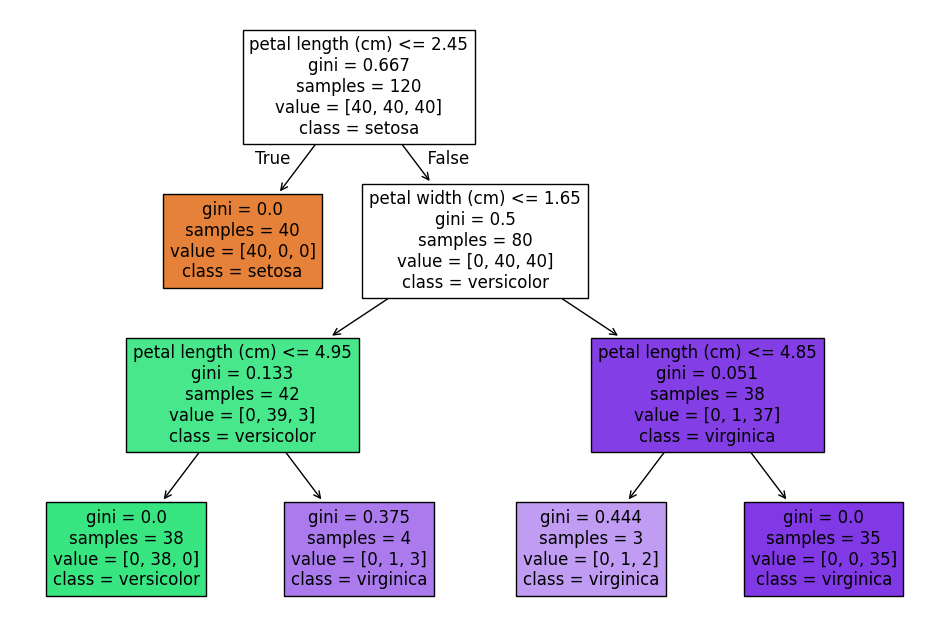

In [15]:
# 데이터 분할 (훈련 세트 80%, 테스트 세트 20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# 의사결정 트리 모델 생성 (모델 파라미터 튜닝 가능)
clf = DecisionTreeClassifier(max_depth=3, random_state=42)
# max_depth : 트리의 최대 깊이 (아래 그림 참고)

# 모델 학습
clf.fit(X_train, y_train)

# 테스트 데이터로 예측
y_pred = clf.predict(X_test)

# 정확도 평가
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# 분류 보고서
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=target_names))

# 의사결정 트리 시각화
plt.figure(figsize=(12, 8))
plot_tree(clf, feature_names=feature_names, class_names=target_names, filled=True)
plt.show()